In [638]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [639]:
df=pd.read_csv("laptop_data.csv")

In [640]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [641]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [643]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [644]:
df.duplicated().sum()

29

In [645]:
df.drop_duplicates(inplace=True)

In [646]:
df.duplicated().sum()

0

In [647]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [648]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200


In [649]:
df["Ram"]=df["Ram"].astype('int32')
df["Weight"]=df["Weight"].astype("float")

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.5+ KB


<Axes: xlabel='Price', ylabel='Count'>

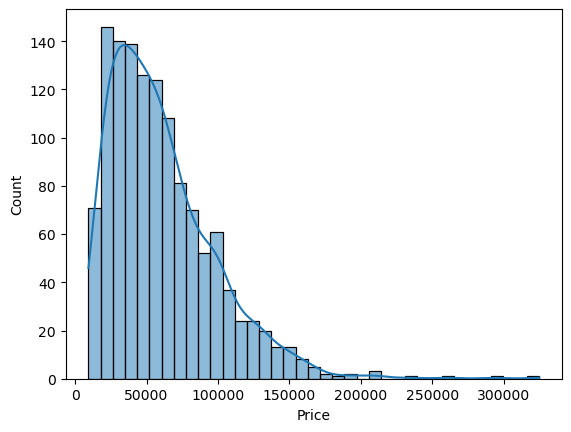

In [651]:
#As we see here that majorly laptop are priced around 500000 and the column is right skewed
sns.histplot(df["Price"],kde=True)
#//log lene padega

<Axes: >

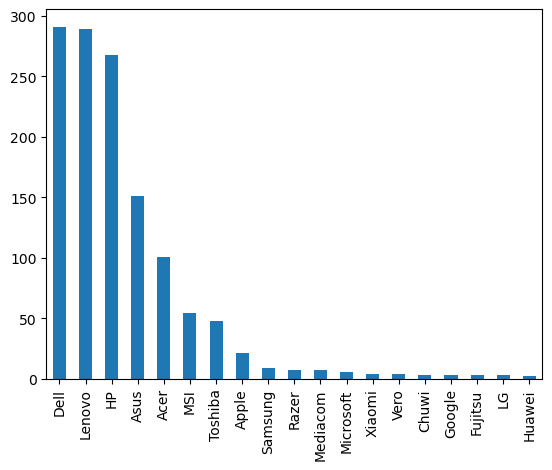

In [652]:
#top 5 selling laptops are Dell,Lenovo,HP,Asus,Acer,Msi
df["Company"].value_counts().plot(kind="bar")


In [653]:
df.shape

(1274, 11)

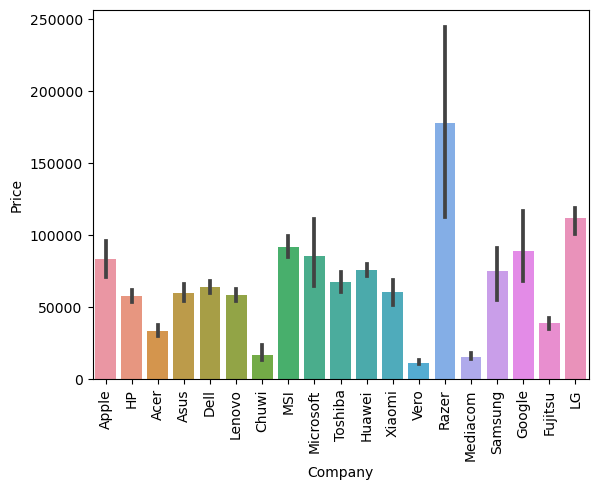

In [654]:
# Razor,Apple,Lg,Microsoft,Apple,Msi,Microsoft are premium range laptops
#while Dell,Asus,Lenovo,HP are budget range laptops which has the best sales
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: >

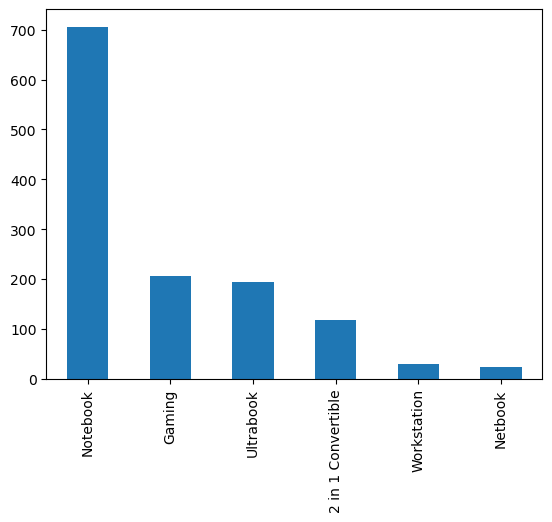

In [655]:
#so,notebook type laptops are the best selling laptops
df["TypeName"].value_counts().plot(kind="bar")

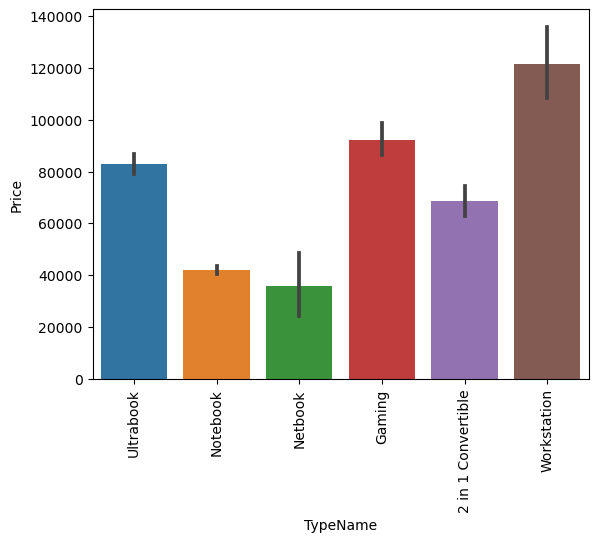

In [656]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [657]:
df["TouchScreen"]=df["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: >

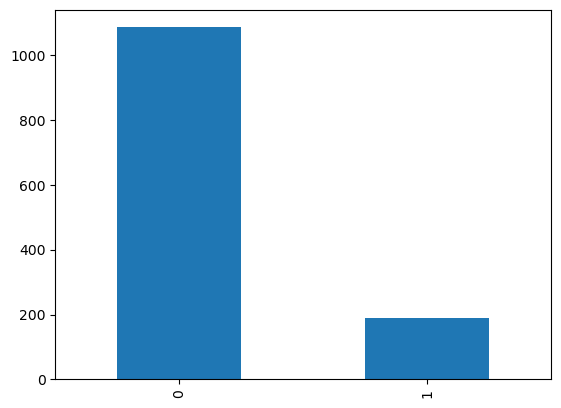

In [658]:
# Non-TouchScreen are in majority here
df["TouchScreen"].value_counts().plot(kind="bar")

<Axes: xlabel='TouchScreen', ylabel='Price'>

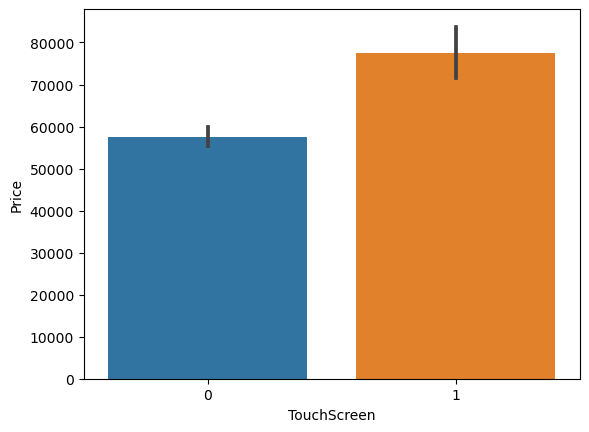

In [659]:
# Here it is clearly visible that Touchscreen Laptops are much costly than Non-TouchScreen Laptops 
sns.barplot(x=df["TouchScreen"],y=df["Price"])

In [660]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [661]:
df["IPS Panel"]=df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

<Axes: >

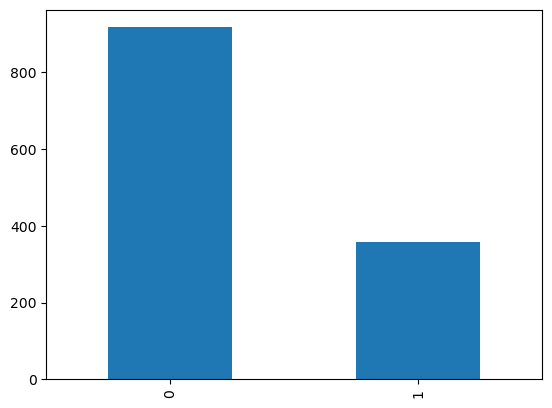

In [662]:
#Laptops without ips panel are in majority
df["IPS Panel"].value_counts().plot(kind="bar")

<Axes: xlabel='IPS Panel', ylabel='Price'>

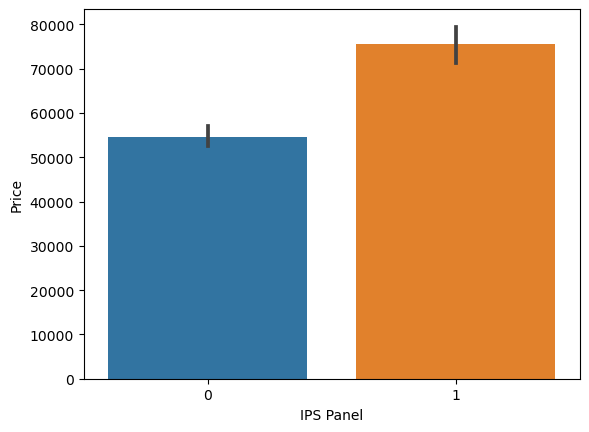

In [663]:
#Laptops without ips panel are cheaper
sns.barplot(x=df["IPS Panel"],y=df["Price"])

In [664]:
df["IPS Panel"].value_counts()

0    917
1    357
Name: IPS Panel, dtype: int64

In [665]:
df2=df["ScreenResolution"].str.split("x",expand=True)#expand converts it into dataframe

In [666]:
df["yres"]=df2[1]
df["xres"]=df2[0]

In [667]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,yres,xres
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,IPS Panel Retina Display 2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,Full HD 1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,IPS Panel Retina Display 2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,IPS Panel Retina Display 2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,768,1366
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1080,IPS Panel Full HD / Touchscreen 1920
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,1800,IPS Panel Quad HD+ / Touchscreen 3200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,768,1366


In [668]:
df["xres"]=df["xres"].str.replace(',',"").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [669]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,yres,xres
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,768,1366
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1080,1920
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,1800,3200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,768,1366


In [670]:
#now finding PPI for every laptops


In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS Panel         1274 non-null   int64  
 13  yres              1274 non-null   object 
 14  xres              1274 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 154.3+ KB


In [672]:
df["yres"]=df["yres"].astype("int32")
df["xres"]=df["xres"].astype("int32")

In [673]:
df["ppi"]=((df["xres"]**2+df["yres"]**2)**(1/2))/df["Inches"]

In [674]:
df.drop(columns=["Inches","yres","xres","ScreenResolution"],inplace=True)

In [675]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [676]:
df["Cpu"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1274 entries, 0 to 1273
Series name: Cpu
Non-Null Count  Dtype 
--------------  ----- 
1274 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [677]:
df["Cpu"]=df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [678]:
def CpuType(text):
    if text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core i7":
        return text
    elif text.split()[0]=="Intel":
        return "Intel Other Processors"
    else :
        return "AMD Processor"
    

In [679]:
df["Cpu"]=df["Cpu"].apply(CpuType)

<Axes: >

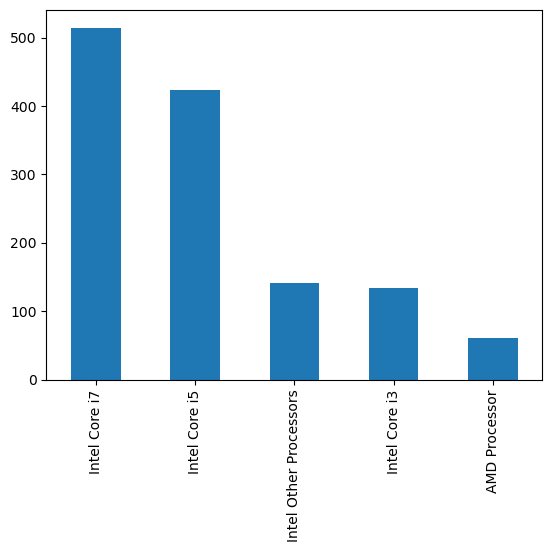

In [680]:
#It is clear most popular is Intel I7 and I5 processor
df["Cpu"].value_counts().plot(kind="bar")

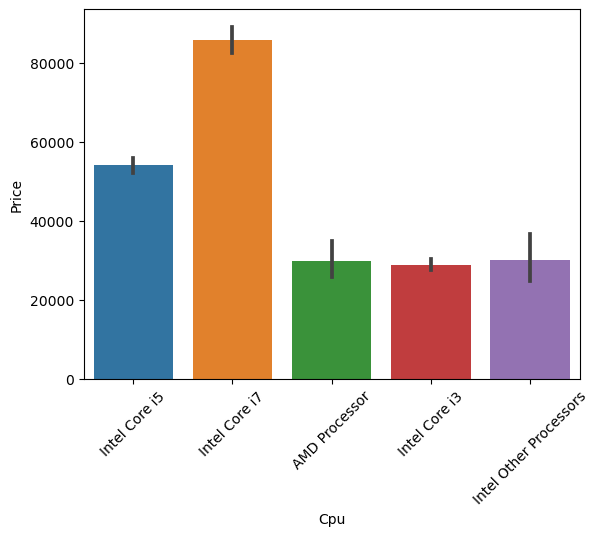

In [681]:
sns.barplot(x=df["Cpu"],y=df["Price"])
plt.xticks(rotation=45)
plt.show()

In [682]:
df.corr()["Price"]

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS Panel      0.250358
ppi            0.469539
Name: Price, dtype: float64

<Axes: >

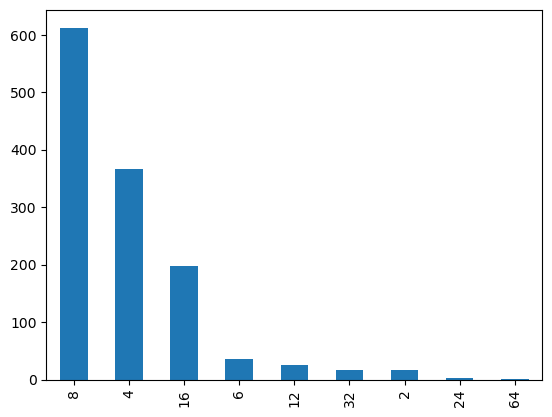

In [683]:
df["Ram"].value_counts().plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price'>

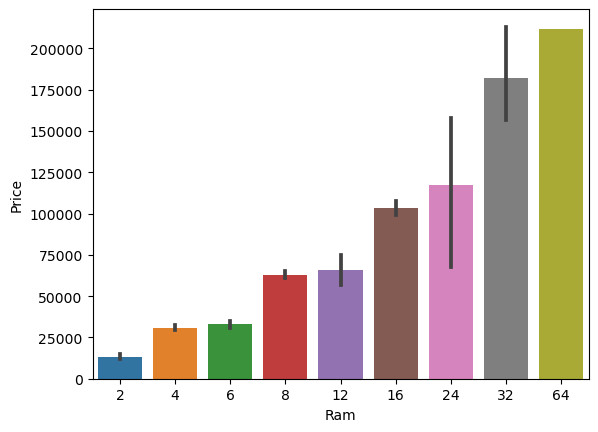

In [684]:
sns.barplot(x=df["Ram"],y=df["Price"])

In [685]:
#df["Memory"]=df["Memory"].apply(lambda x: x.split())

In [686]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [687]:
df["Memory"]=df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"]=df["Memory"].str.replace("GB"," ")
df["Memory"]=df["Memory"].str.replace("TB","000")

In [688]:
new=df["Memory"].str.split("+",n=1,expand=True)
df['first']=new[0]

In [689]:
df["first"].str.strip()
df['second']=new[1]
df["second"].fillna('0',inplace=True)

In [690]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,first,second
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,128 SSD,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,128 Flash Storage,0
2,HP,Notebook,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,256 SSD,0
3,Apple,Ultrabook,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,512 SSD,0
4,Apple,Ultrabook,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,256 SSD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,500 HDD,0
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,128 SSD,0
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,512 SSD,0
1272,Lenovo,Notebook,Intel Other Processors,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,64 Flash Storage,0


In [691]:
df["layer1hdd"]=df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["layer1ssd"]=df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["layer1Flash"]=df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["hybrid1"]=df["first"].apply(lambda x:1 if "Hybrid" in x else 0)
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,first,second,layer1hdd,layer1ssd,layer1Flash,hybrid1
0,Apple,Ultrabook,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,128 SSD,0,0,1,0,0
1,Apple,Ultrabook,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,128 Flash Storage,0,0,0,1,0
2,HP,Notebook,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,256 SSD,0,0,1,0,0
3,Apple,Ultrabook,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,512 SSD,0,0,1,0,0
4,Apple,Ultrabook,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,256 SSD,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,500 HDD,0,1,0,0,0
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,128 SSD,0,0,1,0,0
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,512 SSD,0,0,1,0,0
1272,Lenovo,Notebook,Intel Other Processors,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,64 Flash Storage,0,0,0,1,0


In [692]:
df["layer2hdd"]=df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["layer2ssd"]=df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["layer2Flash"]=df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df["hybrid2"]=df["second"].apply(lambda x:1 if "Hybrid" in x else 0)

In [693]:
df["second"]=df["second"].str.replace(r'\D','')
df["first"]=df["first"].str.replace(r'\D','')

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1897506767.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["second"]=df["second"].str.replace(r'\D','')
C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1897506767.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["first"]=df["first"].str.replace(r'\D','')


In [694]:
df["first"]=df["first"].astype("int32")
df["second"]=df["second"].astype("int32")


In [695]:
df["HDD"]=(df["first"]*df["layer1hdd"]+df["second"]*df["layer2hdd"])
df["SDD"]=(df["first"]*df["layer1ssd"]+df["second"]*df["layer2ssd"])
df["Hybrid"]=(df["first"]*df["hybrid1"]+df["second"]*df["hybrid2"])
df["Flash_drive"]=(df["first"]*df["layer1Flash"]+df["second"]*df["layer2Flash"])

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   Cpu          1274 non-null   object 
 3   Ram          1274 non-null   int32  
 4   Memory       1274 non-null   object 
 5   Gpu          1274 non-null   object 
 6   OpSys        1274 non-null   object 
 7   Weight       1274 non-null   float64
 8   Price        1274 non-null   float64
 9   TouchScreen  1274 non-null   int64  
 10  IPS Panel    1274 non-null   int64  
 11  ppi          1274 non-null   float64
 12  first        1274 non-null   int32  
 13  second       1274 non-null   int32  
 14  layer1hdd    1274 non-null   int64  
 15  layer1ssd    1274 non-null   int64  
 16  layer1Flash  1274 non-null   int64  
 17  hybrid1      1274 non-null   int64  
 18  layer2hdd    1274 non-null   int64  
 19  layer2

In [697]:
df.drop(columns=["layer1hdd","layer1ssd","layer1Flash","hybrid1","layer2hdd","layer2ssd","layer2Flash","hybrid2"],inplace=True)

In [698]:
df.drop(columns=["first","second"],inplace=True)

In [699]:
df.drop(columns=["Memory"],inplace=True)

In [700]:
df["Gpu"].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [701]:
df["Gpu_brand"]=df["Gpu"].apply(lambda x: x.split()[0])

In [702]:
#here Gpu_brand ARM is behaving as outlier so we are removing it
df["Gpu_brand"].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu_brand, dtype: int64

In [703]:
df=df[df["Gpu_brand"]!="ARM"]

<Axes: >

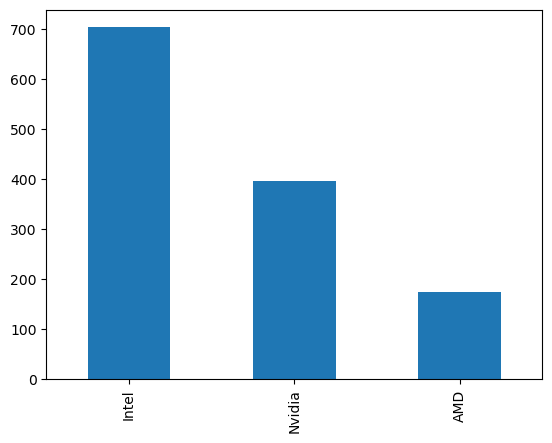

In [704]:
df["Gpu_brand"].value_counts().plot(kind="bar")

<Axes: xlabel='Gpu_brand', ylabel='Price'>

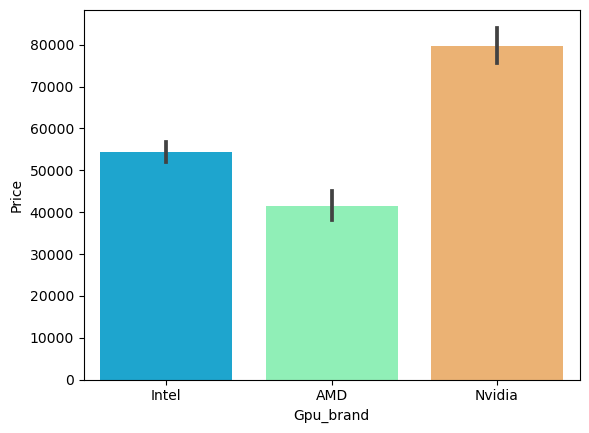

In [705]:
sns.barplot(x=df["Gpu_brand"],y=df["Price"],palette="rainbow")

In [706]:
df.corr()["Price"]

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram            0.739996
Weight         0.211667
Price          1.000000
TouchScreen    0.190382
IPS Panel      0.251514
ppi            0.471481
HDD           -0.098481
SDD            0.669808
Hybrid         0.022490
Flash_drive   -0.036712
Name: Price, dtype: float64

In [707]:
df.drop(columns=["Gpu"],inplace=True)

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1752234203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Gpu"],inplace=True)


In [708]:
df["OpSys"].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<Axes: >

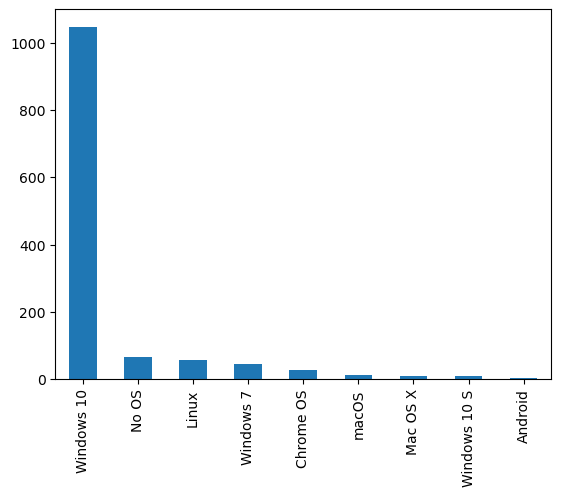

In [709]:
df["OpSys"].value_counts().plot(kind='bar')

In [710]:
def os(sys):
    if sys=="Windows 10" or sys == "Windows 7" or sys=="Windows 10 S":
        return "Windows"
    elif sys=="macOS" or sys=="Mac OS X":
        return "Mac"
    else:
        return "Others/noOS/Linux"

In [711]:
df["OpSys"]=df["OpSys"].apply(os)

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1042458126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OpSys"]=df["OpSys"].apply(os)


In [712]:
df

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,HDD,SDD,Hybrid,Flash_drive,Gpu_brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,71378.6832,0,1,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,Intel Core i5,8,Mac,1.34,47895.5232,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5,8,Others/noOS/Linux,1.86,30636.0000,0,0,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,Intel Core i7,16,Mac,1.83,135195.3360,0,1,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,96095.8080,0,1,226.983005,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,Windows,2.20,38378.6496,0,0,100.454670,500,0,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,Windows,1.80,33992.6400,1,1,157.350512,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,Windows,1.30,79866.7200,1,1,276.053530,0,512,0,0,Intel
1272,Lenovo,Notebook,Intel Other Processors,2,Windows,1.50,12201.1200,0,0,111.935204,0,0,0,64,Intel


In [713]:
df

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,HDD,SDD,Hybrid,Flash_drive,Gpu_brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,71378.6832,0,1,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,Intel Core i5,8,Mac,1.34,47895.5232,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5,8,Others/noOS/Linux,1.86,30636.0000,0,0,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,Intel Core i7,16,Mac,1.83,135195.3360,0,1,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,96095.8080,0,1,226.983005,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,Windows,2.20,38378.6496,0,0,100.454670,500,0,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,Windows,1.80,33992.6400,1,1,157.350512,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,Windows,1.30,79866.7200,1,1,276.053530,0,512,0,0,Intel
1272,Lenovo,Notebook,Intel Other Processors,2,Windows,1.50,12201.1200,0,0,111.935204,0,0,0,64,Intel


In [714]:
df.corr()["Price"]

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram            0.739996
Weight         0.211667
Price          1.000000
TouchScreen    0.190382
IPS Panel      0.251514
ppi            0.471481
HDD           -0.098481
SDD            0.669808
Hybrid         0.022490
Flash_drive   -0.036712
Name: Price, dtype: float64

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

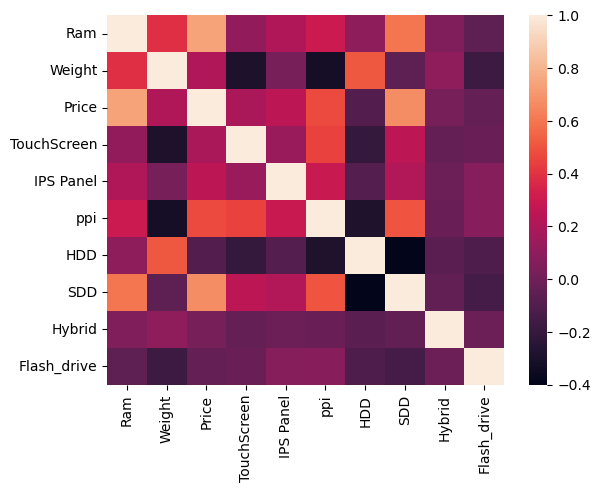

In [715]:
sns.heatmap(df.corr())

In [716]:
df

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,HDD,SDD,Hybrid,Flash_drive,Gpu_brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,71378.6832,0,1,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,Intel Core i5,8,Mac,1.34,47895.5232,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5,8,Others/noOS/Linux,1.86,30636.0000,0,0,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,Intel Core i7,16,Mac,1.83,135195.3360,0,1,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,96095.8080,0,1,226.983005,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,Windows,2.20,38378.6496,0,0,100.454670,500,0,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,Windows,1.80,33992.6400,1,1,157.350512,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,Windows,1.30,79866.7200,1,1,276.053530,0,512,0,0,Intel
1272,Lenovo,Notebook,Intel Other Processors,2,Windows,1.50,12201.1200,0,0,111.935204,0,0,0,64,Intel


<Axes: >

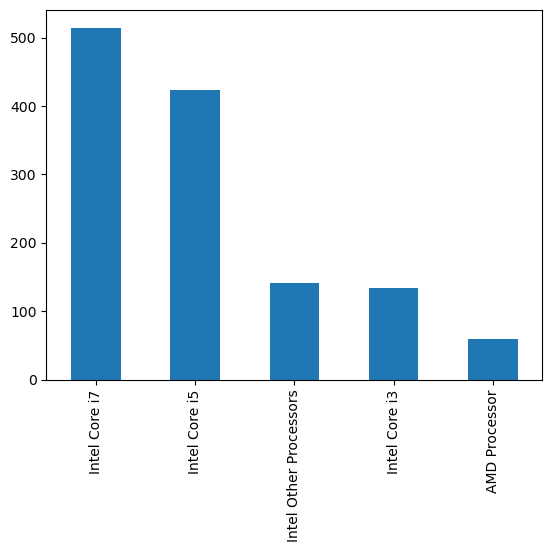

In [717]:
df["Cpu"].value_counts().plot(kind="bar")

<Axes: >

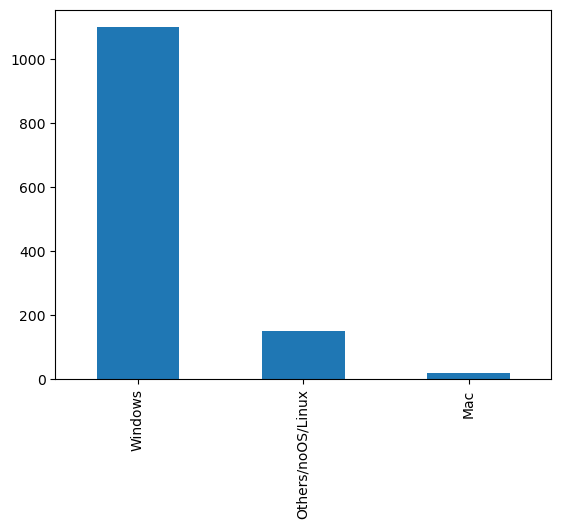

In [718]:
df["OpSys"].value_counts().plot(kind="bar")

<Axes: xlabel='OpSys', ylabel='Price'>

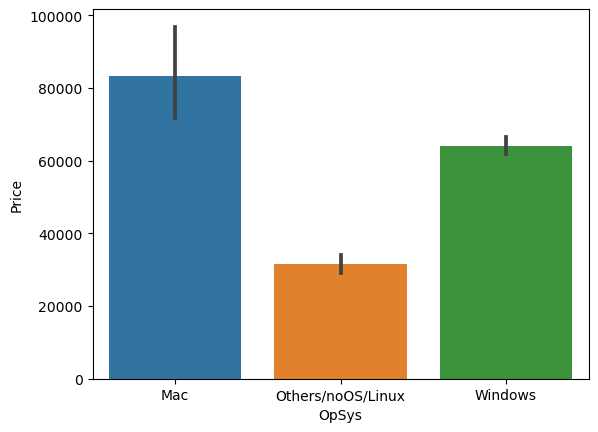

In [719]:
sns.barplot(x=df["OpSys"],y=df["Price"])

In [720]:
df.corr()["Price"]

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram            0.739996
Weight         0.211667
Price          1.000000
TouchScreen    0.190382
IPS Panel      0.251514
ppi            0.471481
HDD           -0.098481
SDD            0.669808
Hybrid         0.022490
Flash_drive   -0.036712
Name: Price, dtype: float64

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\196129849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

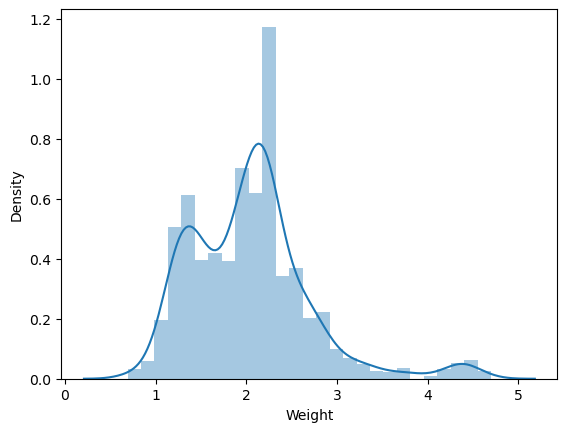

In [721]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

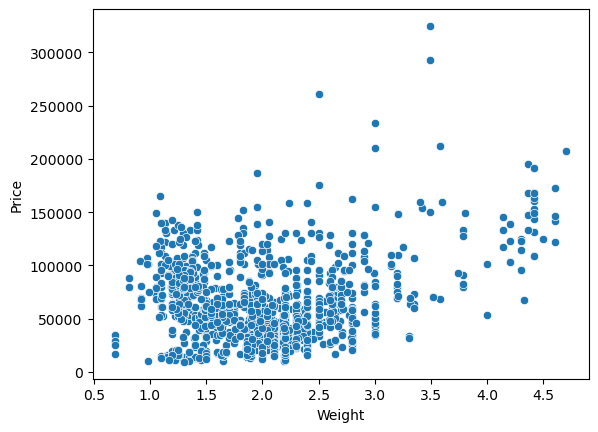

In [722]:
#slighty Linear Behaviour of Weight with Price
sns.scatterplot(x=df["Weight"],y=df["Price"])

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\2575659300.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

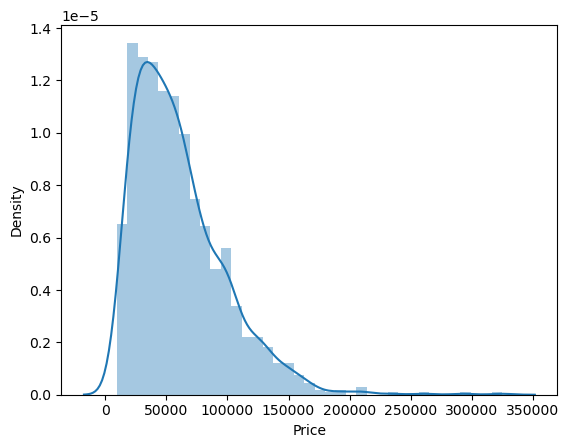

In [723]:
#As the output column is right skewed, so we have take the log of output columns
sns.distplot(df["Price"])

In [724]:
df["Price"]=np.log(df["Price"])

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1558985802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=np.log(df["Price"])


C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_10636\1700597218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

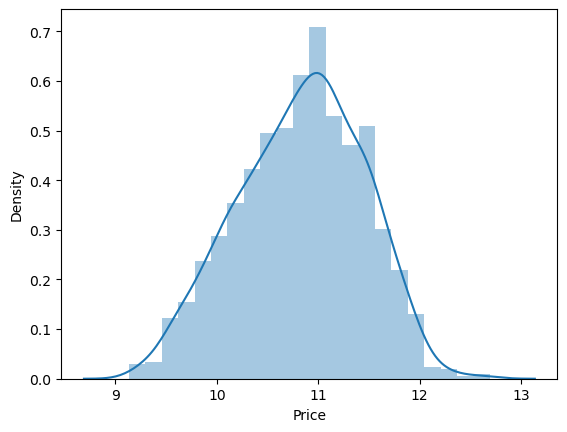

In [725]:
#now it an almost normal function
sns.distplot(df["Price"])

# Model Building

In [947]:
best_score=[]

In [974]:
best_score

[0.8677064776237616,
 0.8555700615398288,
 0.7921671540198261,
 0.8741745073333387,
 0.8571157249870573,
 0.8563801379067261,
 0.8178649175805204]

In [726]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [727]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV,RandomizedSearchCV

In [728]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [729]:
df

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,ppi,HDD,SDD,Hybrid,Flash_drive,Gpu_brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,11.175755,0,1,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,Intel Core i5,8,Mac,1.34,10.776777,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5,8,Others/noOS/Linux,1.86,10.329931,0,0,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,Intel Core i7,16,Mac,1.83,11.814476,0,1,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,11.473101,0,1,226.983005,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,Intel Core i7,4,Windows,2.20,10.555257,0,0,100.454670,500,0,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,Intel Core i7,4,Windows,1.80,10.433899,1,1,157.350512,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,Intel Core i7,16,Windows,1.30,11.288115,1,1,276.053530,0,512,0,0,Intel
1272,Lenovo,Notebook,Intel Other Processors,2,Windows,1.50,9.409283,0,0,111.935204,0,0,0,64,Intel


In [730]:
X=df.drop(columns=["Price"])
y=df["Price"]

In [731]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.15,random_state=2)

In [732]:
X["Company"].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

# Linear Regression

In [865]:
step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          ("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))


r2_score 0.7868856907668542
mae 0.21985990361496469


# Ridge 

In [734]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          ("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
step2=Ridge(alpha=0.2)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))

r2_score 0.7885707724800691
mae 0.21910592832739387


# Lasso

In [735]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          ("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))

r2_score 0.7962058089875249
mae 0.21738136172554207


# knn

In [906]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          ("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=5,weights='distance')
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))

r2_score 0.8135257068480182
mae 0.18583556440979546


# dt

In [737]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          ("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8,max_features=0.45)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))



r2_score 0.7745652669180345
mae 0.22081478196780532


# svm

In [738]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          #("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
step2=SVR(kernel='rbf',C=10000,epsilon=0.01)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))


r2_score 0.8201815565228364
mae 0.19954786593265586


# random forest

In [739]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
         
            
],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))

r2_score 0.8360985913822019
mae 0.18006996261188943


# Adaboost

In [741]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
         
            
],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))

r2_score 0.8136785539546296
mae 0.21681388370832722


# Gradient Boost

In [820]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
         
            
],remainder='passthrough')
step2=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))

r2_score 0.846215500910084
mae 0.18053441515547292


# Xg boost

In [937]:
step1=step1=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
         
            
],remainder='passthrough')
xg=XGBRegressor()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print("r2_score",r2_score(ytest,ypred))
print("mae",mean_absolute_error(ytest,ypred))


r2_score 0.8583378014674559
mae 0.16684850667021


In [939]:
print("cross_val_score",cross_val_score(xg,X,y,scoring='r2',cv=10,n_jobs=-1,verbose=2).mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s


cross_val_score 0.8677064776237616


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [744]:
col_trans=ColumnTransformer(transformers=[
          ("ohe_lin",OneHotEncoder(sparse_output=False,drop="first",handle_unknown='ignore'),[0,1,2,4,13]),   
          ("stand",StandardScaler(),[3,5,6,7,8,9,10,11,12])
            
],remainder='passthrough')
X=col_trans.fit_transform(X)


In [750]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.15,random_state=2)

In [751]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.3124181 ,
        -0.08791985, -0.14716264],
       [ 1.        ,  0.        ,  0.        , ..., -0.9988987 ,
        -0.08791985,  4.05088865],
       [ 0.        ,  0.        ,  0.        , ...,  0.3740625 ,
        -0.08791985, -0.14716264],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.74702369,
        -0.08791985, -0.14716264],
       [ 0.        ,  0.        ,  0.        , ..., -0.9988987 ,
        -0.08791985,  1.951863  ],
       [ 0.        ,  0.        ,  0.        , ..., -0.9988987 ,
        -0.08791985, -0.14716264]])

# for random forest

In [752]:

n_estimators=[100,200,150,300,350]
max_depth=[None,8,10,15]
max_features=[0.2,0.7,0.75,0.8,0.9]
bootstrap=[True,False]
max_samples=[0.2,0.45,0.5,0.6,0.75,0.8]
random_state=[0,1,2,3]

In [753]:
xtrain

array([[ 0.        ,  0.        ,  0.        , ...,  0.3740625 ,
        -0.08791985, -0.14716264],
       [ 0.        ,  0.        ,  0.        , ..., -0.3124181 ,
        -0.08791985, -0.14716264],
       [ 0.        ,  0.        ,  0.        , ...,  0.3740625 ,
        -0.08791985, -0.14716264],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.9988987 ,
        -0.08791985, -0.14716264],
       [ 0.        ,  0.        ,  0.        , ..., -0.9988987 ,
        -0.08791985, -0.14716264],
       [ 1.        ,  0.        ,  0.        , ..., -0.9988987 ,
        -0.08791985,  8.24893993]])

In [755]:
param_grid={
    "n_estimators": n_estimators,
    "max_depth":max_depth,
    "max_features":max_features,
    "bootstrap":bootstrap,
    "max_samples":max_samples,
    "random_state":random_state
}


In [756]:
rf_grid=RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid,n_jobs=-1,verbose=2,scoring="r2",cv=5)

In [757]:
rf_grid.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ABHISHEK RAWAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABHISHEK RAWAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABHISHEK RAWAL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 8, 10, 15],
                                        'max_features': [0.2, 0.7, 0.75, 0.8,
                                                         0.9],
                                        'max_samples': [0.2, 0.45, 0.5, 0.6,
                                                        0.75, 0.8],
                                        'n_estimators': [100, 200, 150, 300,
                                                         350],
                                        'random_state': [0, 1, 2, 3]},
                   scoring='r2', verbose=2)

In [941]:
rf_grid.best_score_

0.8555700615398288

In [871]:
rf_grid.best_estimator_

RandomForestRegressor(max_features=0.9, max_samples=0.5, random_state=2)

In [872]:
rf_grid.best_params_

{'random_state': 2,
 'n_estimators': 100,
 'max_samples': 0.5,
 'max_features': 0.9,
 'max_depth': None,
 'bootstrap': True}

# for Adaboost

In [783]:
n_estimators=[10,20,15,50,100,150,200]
learning_rate=[0.1,0.001,0.0001,1,0.5,0.2,0.3,0.4]
loss=['linear', 'square', 'exponential']

In [784]:
param_grid2={
    "n_estimators":n_estimators,
    "learning_rate":learning_rate,
    "loss":loss
}

In [785]:
ada_grid=GridSearchCV(AdaBoostRegressor(),scoring="r2",cv=5,param_grid=param_grid2,n_jobs=-1,verbose=2)

In [786]:
ada_grid.fit(X,y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.0001, 1, 0.5, 0.2, 0.3,
                                           0.4],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 15, 50, 100, 150, 200]},
             scoring='r2', verbose=2)

In [943]:
ada_grid.best_score_

0.7921671540198261

In [873]:
ada_grid.best_estimator_

AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100)

In [874]:
ada_grid.best_params_


{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}

# Gradient Boosting

In [879]:
loss=['squared_error', 'absolute_error', 'huber', 'quantile']
learning_rate=[0.1,0.01,0.2,0.3,1]
max_depth=[3,4,5,6,1,2]
max_features=[0.5,0.6,0.75]
random_state=[1,2,4,5,10]

In [880]:
param_grid3={
    'loss':loss,
    "max_depth":max_depth,
    "max_features":max_features,
    "learning_rate":learning_rate,
    "random_state":random_state
}

In [881]:
gdb_grid=RandomizedSearchCV(GradientBoostingRegressor(),scoring='r2',param_distributions=param_grid3,cv=10,n_jobs=-1,verbose=2)

In [882]:
gdb_grid.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.2, 0.3,
                                                          1],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5, 6, 1, 2],
                                        'max_features': [0.5, 0.6, 0.75],
                                        'random_state': [1, 2, 4, 5, 10]},
                   scoring='r2', verbose=2)

In [953]:
gdb_grid.best_score_

0.8741745073333387

In [884]:
gdb_grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_depth=4,
                          max_features=0.5, random_state=5)

# extra trees

In [839]:
n_estimators=[100,150,120,200,250,300]
criterion=["squared_error", "absolute_error", "friedman_mse", "poisson"]
max_depth=[None,8,10,12,15,20]
max_features=[0.5,0.6,0.75,0.8,0.9,1]
bootstrap=[True,False]
random_state=[1,2,3,4,5,6,7,8,9,10]

In [840]:
param_grid4={
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'random_state':random_state
}

In [848]:
extra_grid=RandomizedSearchCV(ExtraTreesRegressor(),scoring='r2',param_distributions=param_grid4,cv=10,n_jobs=-1,verbose=2)

In [849]:
extra_grid.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 8, 10, 12, 15, 20],
                                        'max_features': [0.5, 0.6, 0.75, 0.8,
                                                         0.9, 1],
                                        'n_estimators': [100, 150, 120, 200,
                                                         250, 300],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10]},
                   scoring='r2', verbose=2)

In [956]:
extra_grid.best_score_

0.8571157249870573

In [886]:
extra_grid.best_estimator_

ExtraTreesRegressor(bootstrap=True, criterion='absolute_error', max_depth=15,
                    max_features=0.9, n_estimators=150, random_state=8)

In [887]:
extra_grid.best_params_

{'random_state': 8,
 'n_estimators': 150,
 'max_features': 0.9,
 'max_depth': 15,
 'criterion': 'absolute_error',
 'bootstrap': True}

# SVM

In [855]:
C=[0.1,0.01,0.001,1,0.5]
degree=[1,2,3,4,5,6,7,8,9]
kernel=['rbf','poly']

In [856]:
param_grid5={
    'C':C,
    'degree':degree,
    'kernel':kernel
}

In [857]:
svr_grid=GridSearchCV(SVR(),param_grid=param_grid5,scoring='r2',cv=10,n_jobs=-1,verbose=2)

In [858]:
svr_grid.fit(X,y)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001, 1, 0.5],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['rbf', 'poly']},
             scoring='r2', verbose=2)

In [862]:
svr_grid.best_params_

{'C': 1, 'degree': 1, 'kernel': 'rbf'}

In [959]:
svr_grid.best_score_

0.8563801379067261

# for knn

In [910]:
n_neighbors=[2,4,5,6,7,8,10]
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']

In [912]:
param_grid6={
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm
}

In [913]:
knn_grid=GridSearchCV(KNeighborsRegressor(),param_grid=param_grid6,cv=10,scoring='r2',n_jobs=-1,verbose=2)

In [914]:
knn_grid.fit(X,y)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 4, 5, 6, 7, 8, 10],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=2)

In [918]:
knn_grid.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', weights='distance')

In [919]:
knn_grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}

In [976]:
knn_grid.best_score_

0.8178649175805204

In [977]:
best_score

[0.8677064776237616,
 0.8555700615398288,
 0.7921671540198261,
 0.8741745073333387,
 0.8571157249870573,
 0.8563801379067261,
 0.8178649175805204]

# SO,we have the best parameters of all the best performing algorithims

In [996]:
Rf=RandomForestRegressor(random_state= 2,n_estimators= 100,max_samples= 0.5,max_features= 0.9,max_depth= None,bootstrap= True)
ADA=AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100)
Gdb=GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_depth=4,max_features=0.5, random_state=5)
Extra=ExtraTreesRegressor(bootstrap=True, criterion='absolute_error', max_depth=15,max_features=0.9, n_estimators=150, random_state=8)
Svr=SVR(C= 1, degree= 1, kernel= 'rbf')
Xg=XGBRegressor()
KNN=KNeighborsRegressor(algorithm='kd_tree', weights='distance')

In [990]:
esti=[
    ('Xg',Xg),
    ('Rf',Rf),
   # ('ADA',ADA),
    ('Gdb',Gdb),
    ('Extra',Extra),
    ('Svr',Svr),
   # ('KNN',KNN)
]

In [991]:
# with uniform weights
vr=VotingRegressor(estimators=esti)

In [993]:
print("R2_score in Voting Using top 5 models",cross_val_score(vr,X,y,scoring='r2',cv=10,n_jobs=-1,verbose=2).mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   16.7s remaining:    7.1s


R2_score in Voting Using top 5 models 0.8805309544085127


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.1s finished


# Stacking

In [995]:
from sklearn.ensemble import StackingRegressor

In [1016]:
esti2=[
    ('Xg',Xg),
    ('Rf',Rf),
   #('ADA',ADA),
    ('Gdb',Gdb),
    ('Extra',Extra),
    ('Svr',Svr),
    #('KNN',KNN)
]

In [1017]:
St=StackingRegressor(estimators=esti2,final_estimator=RandomForestRegressor(),cv=None)

In [1018]:
print("R2_score in Stacking Using top models as base estimators & RandomForest as meta model\n"
      ,cross_val_score(St,X,y,scoring='r2',cv=10,n_jobs=-1,verbose=2).mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.5min remaining:  1.5min


R2_score in Stacking Using top models as base estimators & RandomForest as meta model
 0.8666218197343436


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.1min finished


In [1014]:
St2=StackingRegressor(estimators=esti2,final_estimator=LinearRegression(),cv=None)

In [1015]:
print("R2_score in Stacking Using top models as base estimators & LinearRegression as meta model\n"
      ,cross_val_score(vr,X,y,scoring='r2',cv=10,n_jobs=-1,verbose=2).mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   45.8s remaining:   19.6s


R2_score in Stacking Using top models as base estimators & RandomForest as meta model
 0.8805309544085127


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


# So,now we selecting voting regressor with uniform weight as our final model